# Module 3 Project: Classification
By: Bradley Ellisor & Gabe Arnold

Business Case: Banks spend millions of dollars a year on marketing new products to their customers. 




In [64]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
#
import os
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#
from sklearn.preprocessing import LabelEncoder
make_lb = LabelEncoder()
#
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import xgboost as xgb

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Read in Data & Data Cleaning

In [2]:
## Read in Data
df = pd.read_csv('bank-additional-full.csv', sep =';')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
for (columnName, columnData) in df.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.unique())

Colunm Name :  age
Column Contents :  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Colunm Name :  job
Column Contents :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Colunm Name :  marital
Column Contents :  ['married' 'single' 'divorced' 'unknown']
Colunm Name :  education
Column Contents :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Colunm Name :  default
Column Contents :  ['no' 'unknown' 'yes']
Colunm Name :  housing
Column Contents :  ['no' 'yes' 'unknown']
Colunm Name :  loan
Column Contents :  ['no' 'yes' 'unknown']
Colunm Name :  contact
Column Contents :  ['telephone' 'cellular']
Colunm Name :  month
Column Conte

In [5]:
# Split into target and features dataframes

X_df = df.drop('y', axis = 1)
y = df['y']
X_df.shape, y.shape

((41188, 20), (41188,))

In [6]:
y = pd.Series(np.where(y.values == 'yes', 1, 0), y.index)

y.value_counts()

0    36548
1     4640
dtype: int64

In [7]:
X_df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [8]:
X_df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
X_df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [10]:
X_df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [11]:
X_df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

# EDA

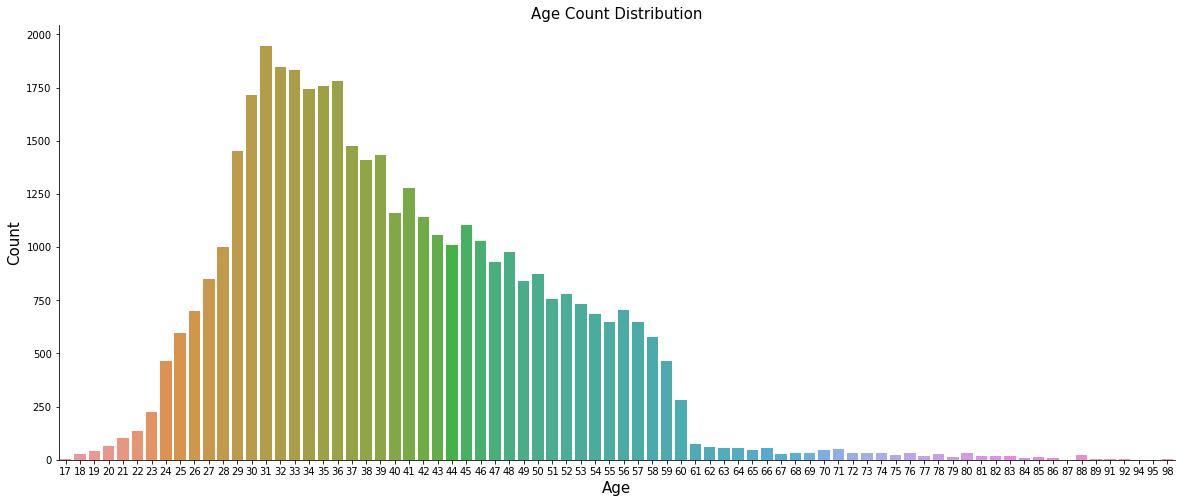

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
plt.savefig('age_distribution')
sns.despine()

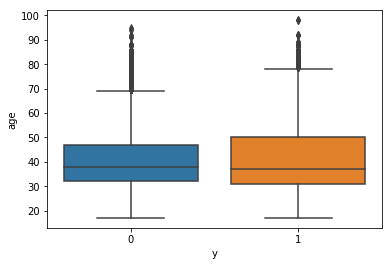

In [115]:
sns.boxplot(x=df['y'],y=df['age'])

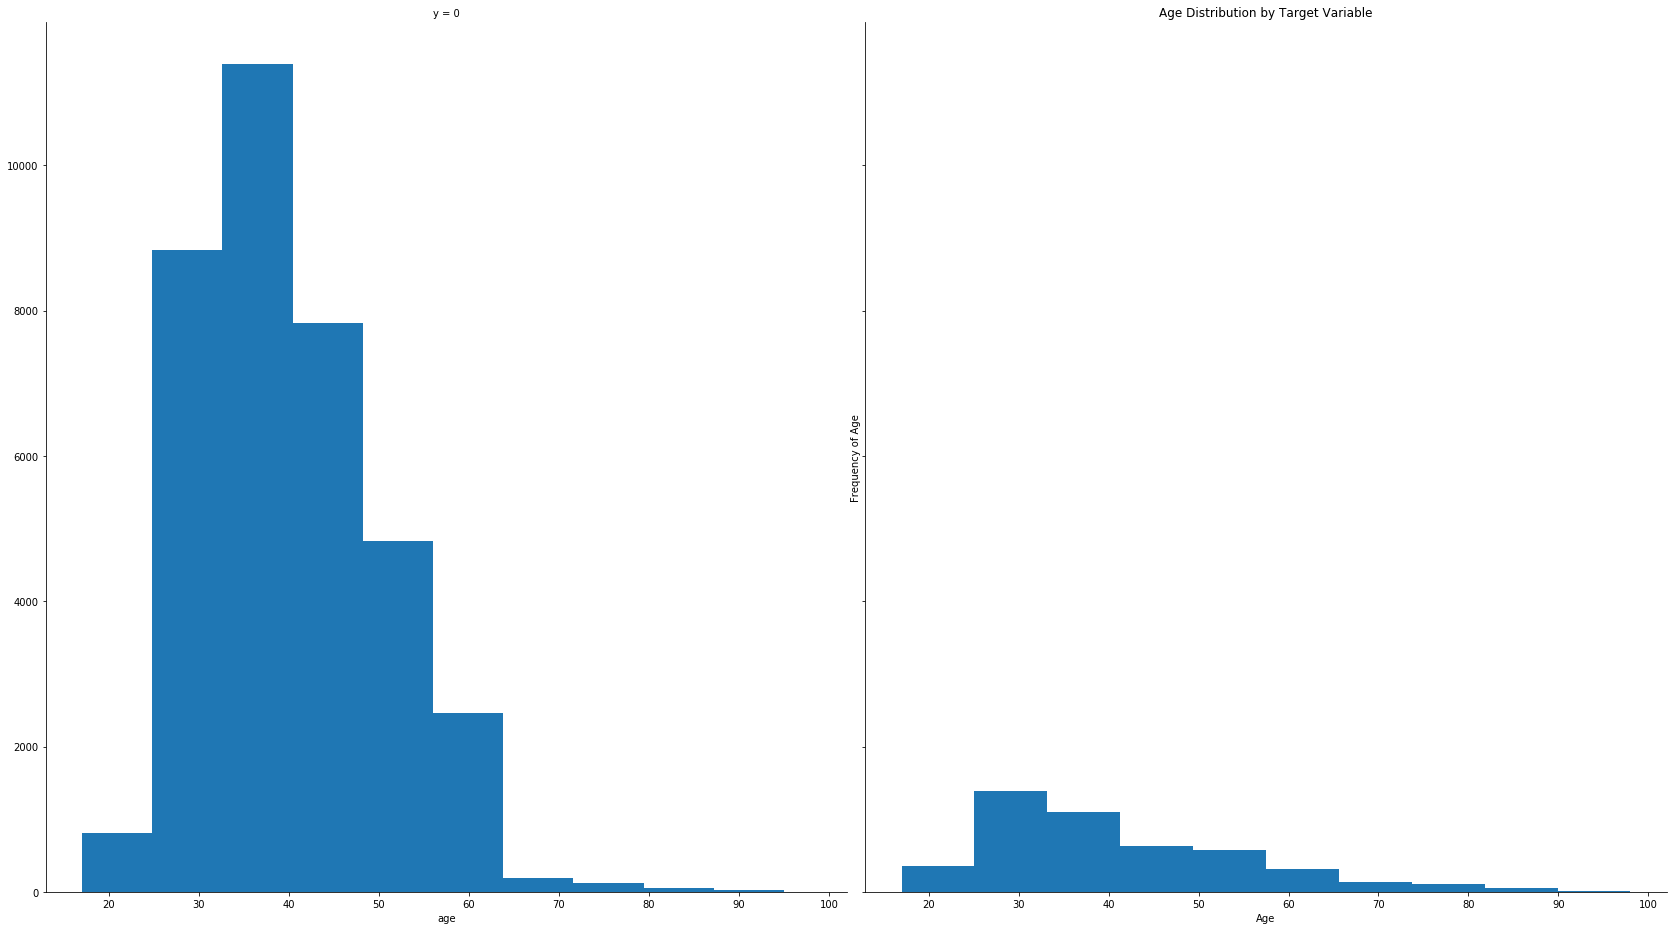

In [116]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(plt.hist, "age")
plt.title('Age Distribution by Target Variable')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')
g.savefig("age_by_class.png")

In [13]:
#bin the ages seperated out by decade

X_df['age_bin'] = pd.cut(X_df['age'],9, labels = ['10s','20s', '30s', '40s','50s','60s','70s','80s','90s'])
X_df[['age', 'age_bin']]
dums = pd.get_dummies(X_df['age_bin'])
X_df.drop(columns=['age'], axis =1, inplace =True)
df=df.join(dums)

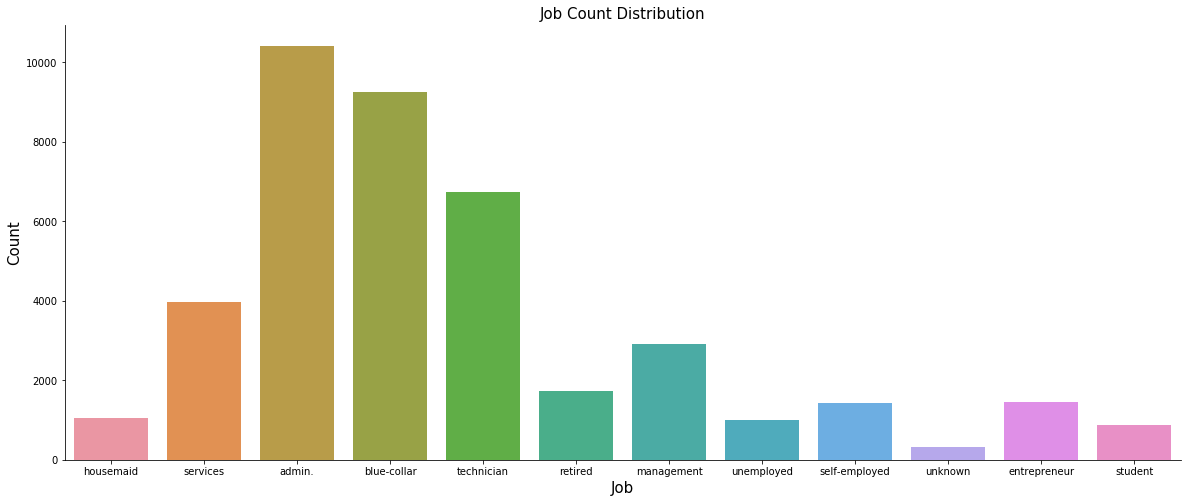

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
plt.savefig('job_distribution')
sns.despine()

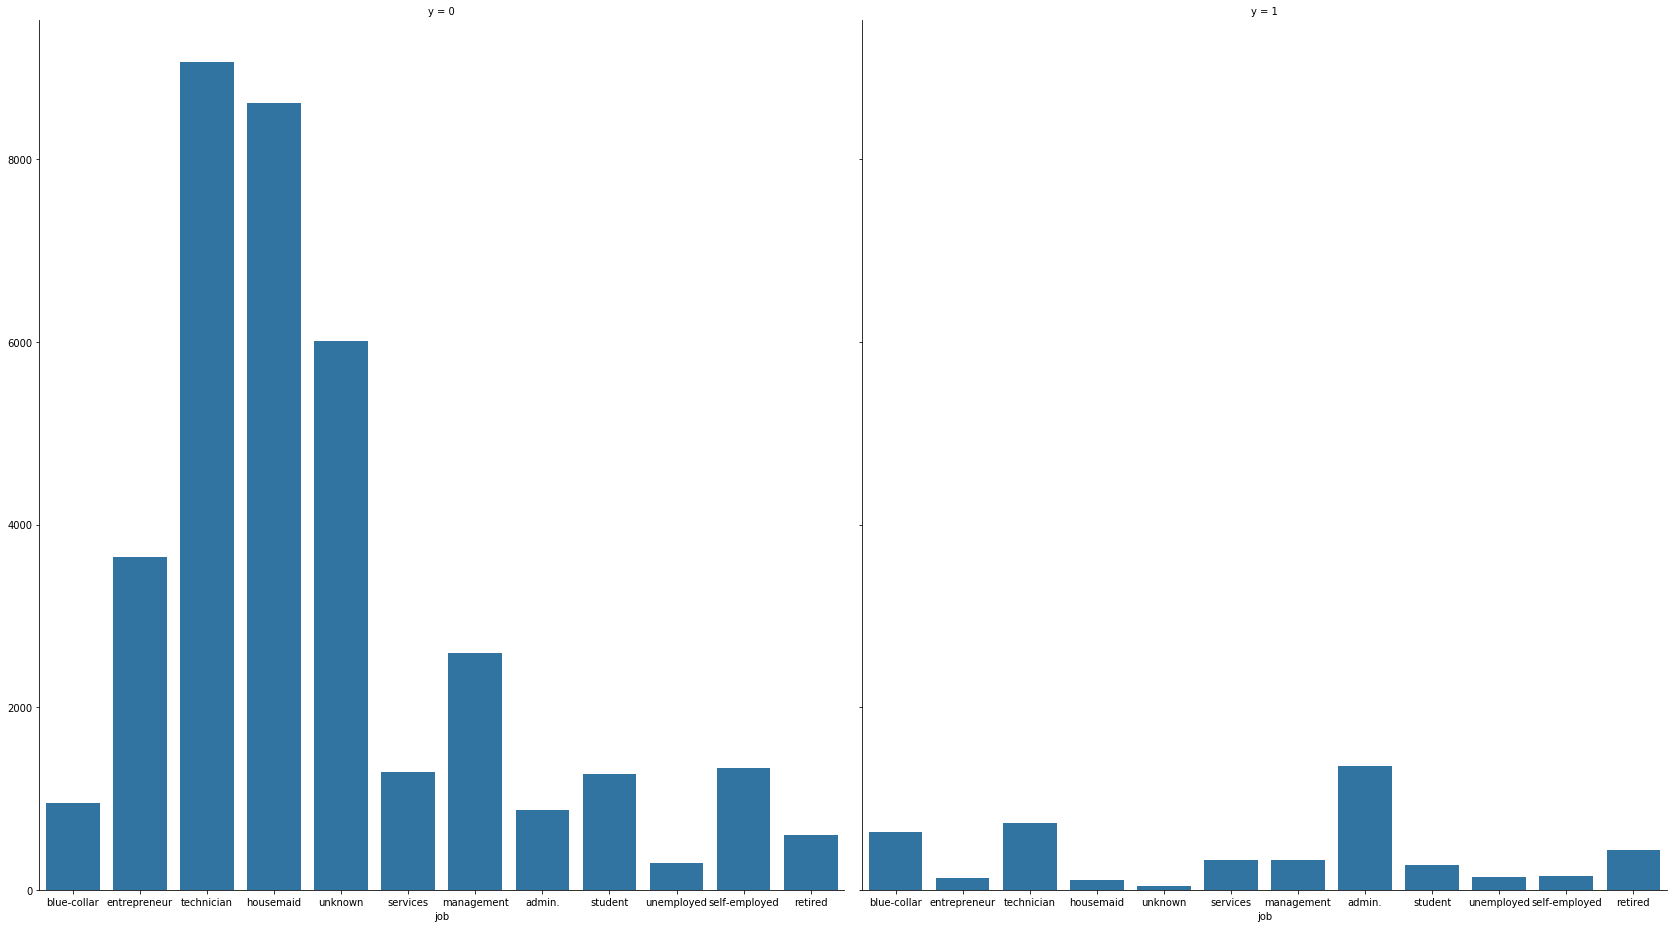

In [114]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(sns.countplot, "job")

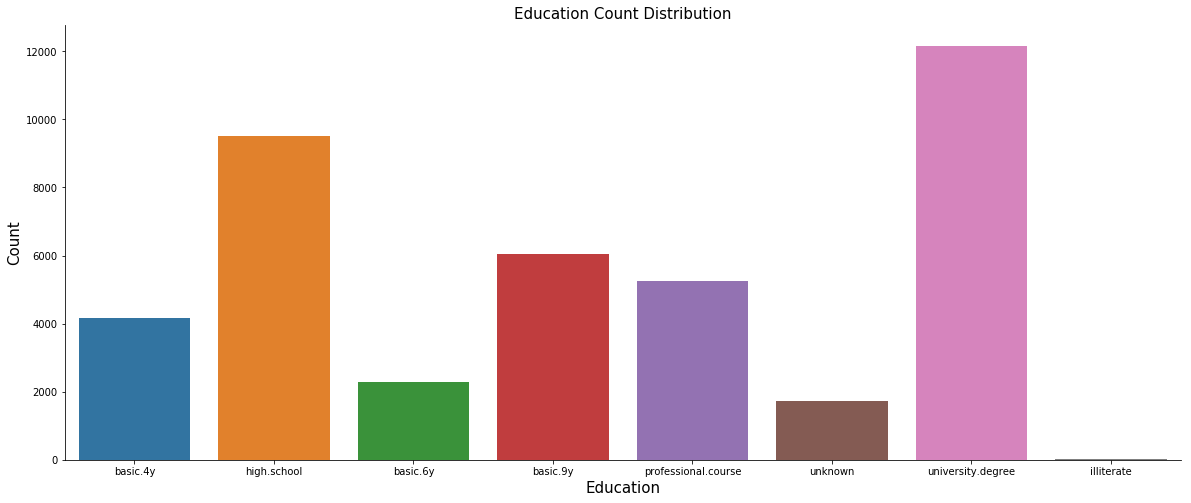

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
sns.despine()

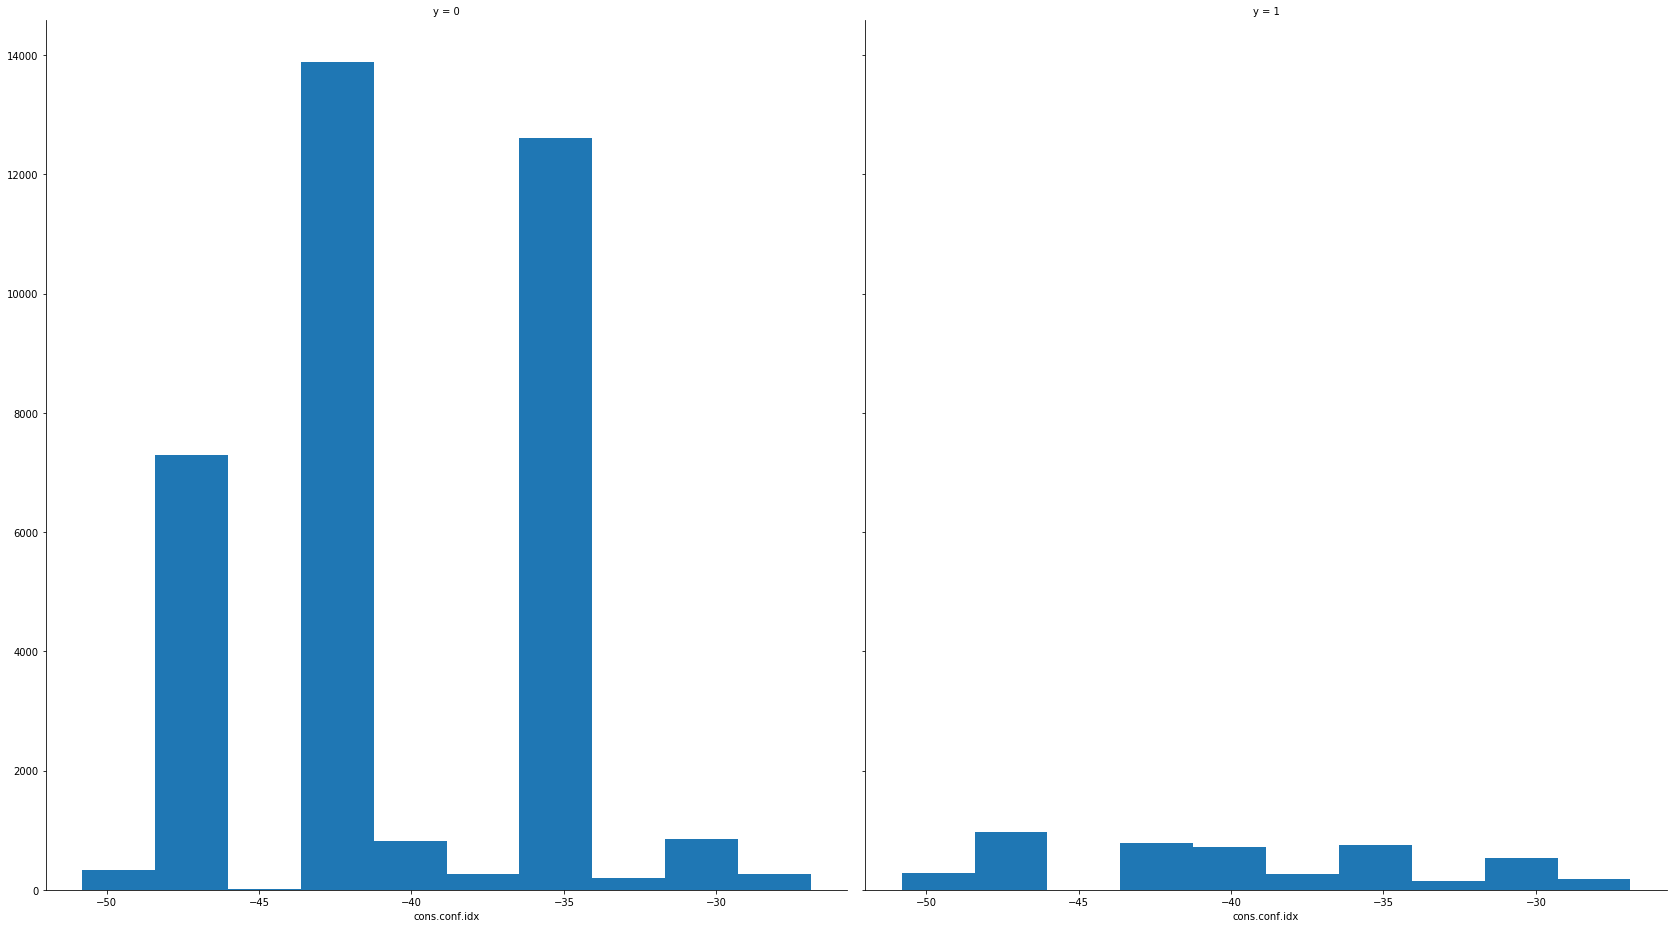

In [117]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(plt.hist, "cons.conf.idx")

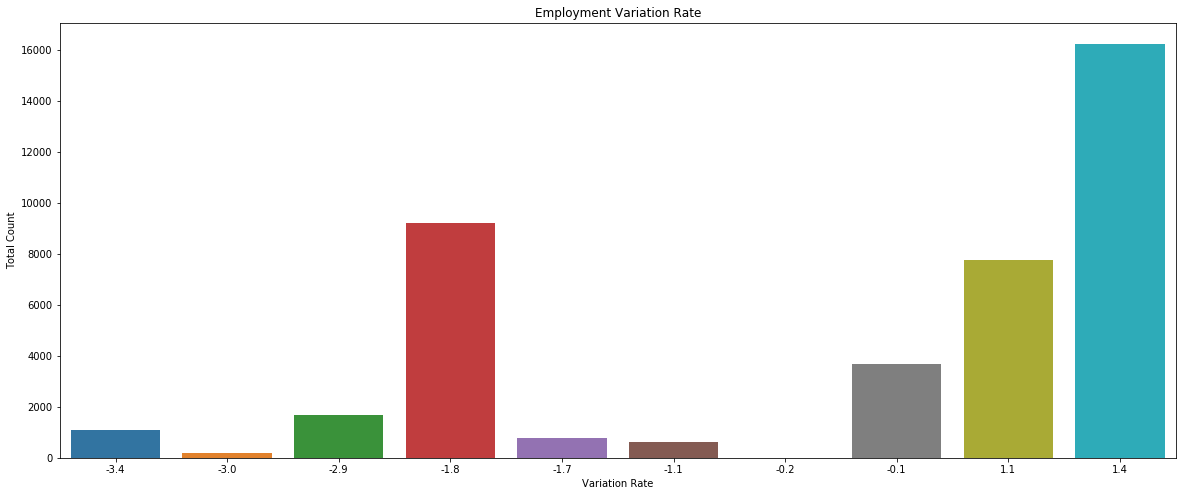

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
emp_var_rate_chart = sns.countplot(x=df['emp.var.rate'])
plt.title('Employment Variation Rate')
plt.xlabel('Variation Rate')
plt.ylabel('Total Count')
emp_var_rate_chart.figure.savefig("emp_var_rate.png")

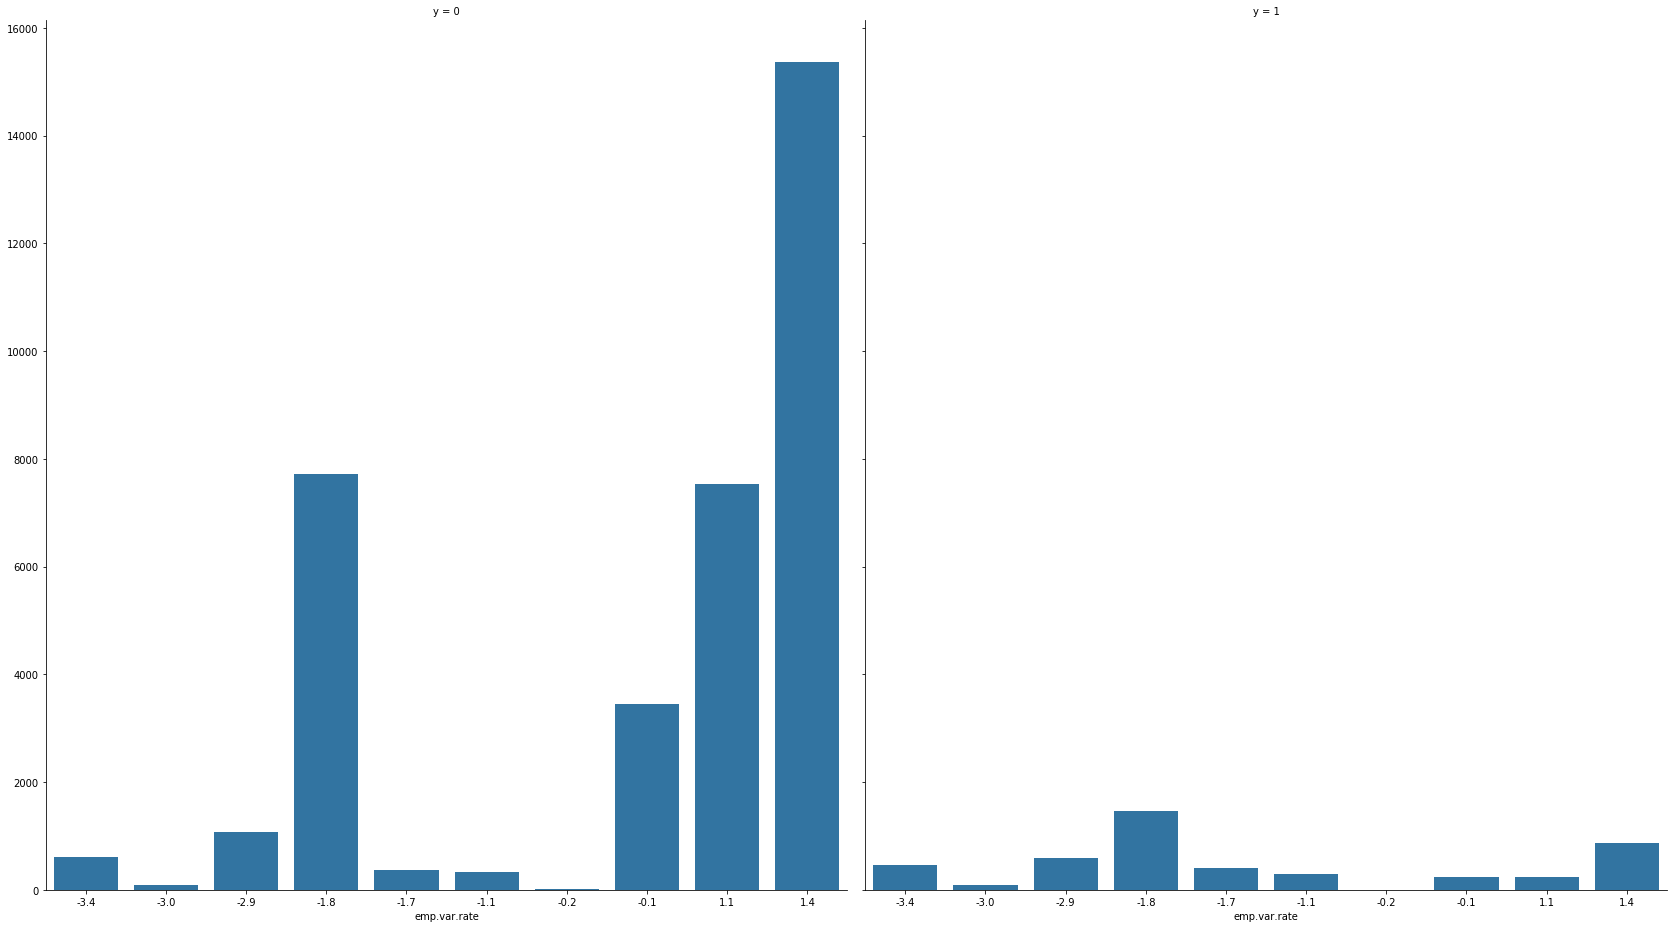

In [118]:
g = sns.FacetGrid(df, col="y", height=13, aspect=.9)
g.map(sns.countplot, "emp.var.rate")
g.savefig("emp_var_rate_by_class.png")

## Hypothesis Testing

In [105]:
df.y = pd.Series(np.where(df.y.values == 'yes', 1, 0), df.y.index)

Is there a statistically significant difference between 
those that subscribed to the new term deposit and the employment rate?


NH = No there is no statistical difference.


AH = Yes there is a statistical difference.


In [106]:
stats.ttest_ind(df[df['y']==0]['emp.var.rate'], df[df['y']==1]['emp.var.rate'])

Ttest_indResult(statistic=63.433665552940745, pvalue=0.0)

As we can see from a pval of zero, Since it's lower than a alpha of .05, 
we can reject the null hypothesis that the means are equal.

Is there a statistically significant difference between those that subscribed to the new term deposit 
and the market measure?

NH = No there is no statistical difference.

AH = Yes there is a statistical difference.

In [109]:
stats.ttest_ind(df[df['y']==0]['euribor3m'], df[df['y']==1]['euribor3m'])

Ttest_indResult(statistic=65.64662251866282, pvalue=0.0)

As we can see from a pval of zero, Since it's lower than a alpha of .05, 
we can reject the null hypothesis that the means are equal.

In [16]:
mc = MultiComparison(y, X_df['age_bin'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10s    20s  -0.0849  0.001 -0.1063 -0.0634   True
   10s    30s   -0.114  0.001 -0.1357 -0.0922   True
   10s    40s  -0.1133  0.001 -0.1359 -0.0907   True
   10s    50s  -0.0775  0.001 -0.1024 -0.0526   True
   10s    60s   0.2343  0.001  0.1824  0.2861   True
   10s    70s   0.2888  0.001  0.2245   0.353   True
   10s    80s   0.2962  0.001  0.2016  0.3908   True
   10s    90s   0.3008 0.0585 -0.0052  0.6067  False
   20s    30s  -0.0291  0.001 -0.0412  -0.017   True
   20s    40s  -0.0284  0.001 -0.0419 -0.0149   True
   20s    50s   0.0074    0.9 -0.0096  0.0245  False
   20s    60s   0.3191  0.001  0.2705  0.3677   True
   20s    70s   0.3736  0.001   0.312  0.4353   True
   20s    80s   0.3811  0.001  0.2882  0.4739   True
   20s    90s   0.3856 0.0029  0.0802  0.6911   True
   30s    40s   0.0007    0.9 -0.0133  0.0146 

In [17]:
mc = MultiComparison(y, X_df['education'])
mc_results = mc.tukeyhsd()
print(mc_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
           basic.4y            basic.6y  -0.0205  0.197 -0.0453 0.0044  False
           basic.4y            basic.9y  -0.0242 0.0034 -0.0435 -0.005   True
           basic.4y         high.school   0.0059    0.9 -0.0119 0.0236  False
           basic.4y          illiterate   0.1197 0.7188 -0.1061 0.3456  False
           basic.4y professional.course    0.011 0.6749 -0.0088 0.0308  False
           basic.4y   university.degree   0.0348  0.001  0.0176 0.0519   True
           basic.4y             unknown   0.0425  0.001  0.0152 0.0698   True
           basic.6y            basic.9y  -0.0038    0.9 -0.0272 0.0197  False
           basic.6y         high.school   0.0263  0.008  0.0041 0.0486   True
           basic.6y          illiterate   0.1402 0.5566 -0.0861 

## Feature Engineering

In [18]:
# Label encode categorical variables.
label_encoder = LabelEncoder()
mappings = []

# Desired label orders for categorical columns.
educ_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.
def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)

# Use dummy variables for occupation

X_df = pd.concat([X_df, pd.get_dummies(X_df['job'])],axis=1).drop('job',axis=1)

X_df = pd.concat([X_df, pd.get_dummies(X_df['month'])],axis=1).drop('month',axis=1)

X_df = pd.concat([X_df, pd.get_dummies(X_df['age_bin'])],axis=1).drop('age_bin',axis=1)

# Use ordered cat.codes for days, months, and education

ordered_labels(X_df, 'education', educ_order)

ordered_labels(X_df, 'day_of_week', day_order)

# Same label encoding for rest since low cardinality

for i, col in enumerate(X_df):
    if X_df[col].dtype == 'object':
        X_df[col] = label_encoder.fit_transform(np.array(X_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))
X_df.head()

,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,1,2,0,0,0,1,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,5,1,0,0,1,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,5,0,2,0,1,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,0,0,0,1,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,5,0,0,2,1,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


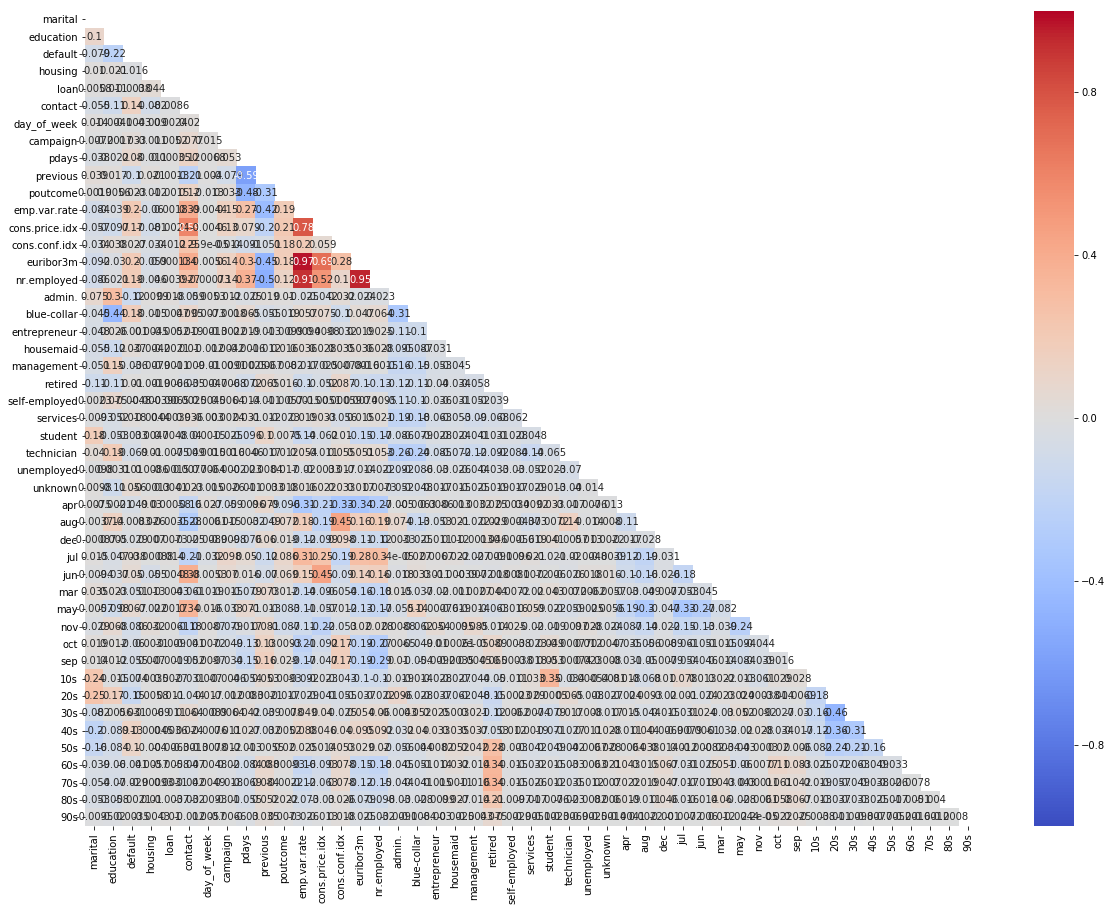

In [112]:
# Looking for multicollinearity
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(X_df.corr())
sns.heatmap(X_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)
plt.savefig('heatmap')

In [20]:
X_df.to_csv('model_ready3.csv')

In [21]:
X_df.columns

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'apr', 'aug', 'dec', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', '10s', '20s', '30s', '40s',
       '50s', '60s', '70s', '80s', '90s'],
      dtype='object')

# Feature Selection

For Feature Selection, we're goig to keep as much data as we can. 

Duration is one feature we will drop because it does not provide any insight going in to a phonecall. Obviously talking to a person longer will have them more likely to subscribe to a product but before the call takes place you don't know how long the call will last. 

To increase the liklihood of making a sale, try scheduling a conference with a client rather than cold-call. 

In [22]:
X_df.drop('duration', inplace = True, axis =1)

# Modeling

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 47), (8238, 47), (32950,), (8238,))

In [24]:
# Normalize using MinMaxScaler to constrain values to between 0 and 1.
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=13)

# Logistic Regression

In [26]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'f1').mean())

[[7187  123]
 [ 728  200]]
90.0


# KNN

In [27]:
# X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_df, y, test_size = 0.25, random_state = 42)
# #Neighbors
# neighbors = np.arange(0,25)
# #Create empty list that will hold cv scores
# cv_scores = []
# #Perform 10-fold cross validation on training set for odd values of k:
# for k in neighbors:
#     k_value = k+1
#     knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean', n_jobs=-1)
#     kfold = model_selection.KFold(n_splits=10, random_state=42)
#     scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='f1')
#     cv_scores.append(scores.mean()*100)
#     print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))
# optimal_k = neighbors[cv_scores.index(max(cv_scores))]
# print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))
# plt.plot(neighbors, cv_scores)
# plt.xlabel('Number of Neighbors K')
# plt.ylabel('Train f1')
# plt.show()


In [28]:
# knn = KNeighborsClassifier(n_neighbors=optimal_k)
# knn.fit(X_train, y_train)
# knnpred = knn.predict(X_test)
# print(confusion_matrix(y_test, knnpred))
# print(round(accuracy_score(y_test, knnpred),2)*100)
# KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'f1').mean())

# Decision Tree

In [29]:
dtree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'f1').mean())

[[6562  748]
 [ 615  313]]
83.0


# Random Forest

In [30]:
rfc = RandomForestClassifier(n_estimators = 200, class_weight = 'balanced')
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'f1').mean())

[[7062  248]
 [ 673  255]]
89.0


# XGBoost

In [31]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'f1').mean())

[[7123  187]
 [ 676  252]]
90.0


In [32]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                            'Logistic Model',  'XGBoost'],
                'Score':  [RFCCV, DTREECV, LOGCV, XGB]})
models.sort_values(by='Score', ascending=False)

,Models,Score
3,XGBoost,0.392004
0,Random Forest Classifier,0.381448
2,Logistic Model,0.343116
1,Decision Tree Classifier,0.336597


# Tuning

In [33]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))},
    {'classifier' : [XGBClassifier()],
     'classifier__max_depth' : [4,5,6],
     'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__min_child_weight' : [1],
    'classifier__gamma' : [0.1, 0.2, 0.3],
    'classifier__subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'classifier__scale_pos_weight' : [1]}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 550 candidates, totalling 2750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 223 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 823 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1273 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1823 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2473 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 2750 out of 2750 | elapsed: 17.3min finished


In [34]:
best_clf.best_estimator_.get_params()['classifier']

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.8973051711580481


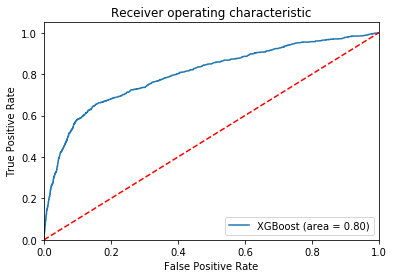

In [36]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
classes = best_clf.predict(X_test)

accuracy = metrics.accuracy_score(classes, y_test)

balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)

average_precision = metrics.average_precision_score(classes, y_test)

f1_score = metrics.f1_score(classes, y_test)

recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.8973051711580481 0.7605486659613034 0.24461206896551724 0.16686732636826923 0.34923076923076923 0.6102150537634409 0.8007591012547761


In [38]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7866
           1       0.24      0.61      0.35       372

    accuracy                           0.90      8238
   macro avg       0.61      0.76      0.65      8238
weighted avg       0.95      0.90      0.92      8238



In [39]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(best_clf, open(filename, 'wb'))

In [40]:
from xgboost import plot_importance

In [97]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [48]:
X_df.columns

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'apr', 'aug', 'dec', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', '10s', '20s', '30s', '40s',
       '50s', '60s', '70s', '80s', '90s'],
      dtype='object')

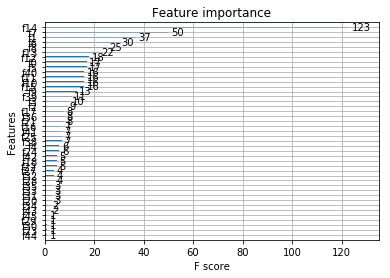

In [47]:
# plot feature importance
plot_importance(model)
pyplot.show()

[0.00488296 0.005274   0.01264841 0.00699647 0.00508162 0.01576691
 0.00746058 0.00865158 0.03411253 0.00975383 0.04682187 0.06707803
 0.01543229 0.04454169 0.01228418 0.50115645 0.00231769 0.00691172
 0.00305496 0.         0.00339141 0.01237753 0.00353549 0.01087888
 0.00313627 0.0074246  0.         0.0063295  0.01242673 0.00223038
 0.00722993 0.00648499 0.00716172 0.00715376 0.00165815 0.005611
 0.03373494 0.         0.01337341 0.00640478 0.00767826 0.00487476
 0.00492583 0.00705921 0.01008022 0.00461061 0.        ]


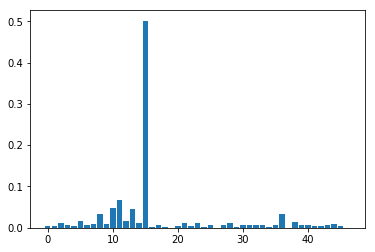

In [46]:
from matplotlib import pyplot
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [51]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Accuracy: 89.73%
Thresh=0.000, n=47, Accuracy: 89.52%
Thresh=0.000, n=47, Accuracy: 89.52%
Thresh=0.000, n=47, Accuracy: 89.52%
Thresh=0.000, n=47, Accuracy: 89.52%
Thresh=0.002, n=43, Accuracy: 89.63%
Thresh=0.002, n=42, Accuracy: 89.68%
Thresh=0.002, n=41, Accuracy: 89.39%
Thresh=0.003, n=40, Accuracy: 89.45%
Thresh=0.003, n=39, Accuracy: 89.72%
Thresh=0.003, n=38, Accuracy: 89.66%
Thresh=0.004, n=37, Accuracy: 89.57%
Thresh=0.005, n=36, Accuracy: 89.69%
Thresh=0.005, n=35, Accuracy: 89.67%
Thresh=0.005, n=34, Accuracy: 89.75%
Thresh=0.005, n=33, Accuracy: 89.55%
Thresh=0.005, n=32, Accuracy: 89.57%
Thresh=0.005, n=31, Accuracy: 89.43%
Thresh=0.006, n=30, Accuracy: 89.48%
Thresh=0.006, n=29, Accuracy: 89.55%
Thresh=0.006, n=28, Accuracy: 89.50%
Thresh=0.006, n=27, Accuracy: 89.58%
Thresh=0.007, n=26, Accuracy: 89.29%
Thresh=0.007, n=25, Accuracy: 89.44%
Thresh=0.007, n=24, Accuracy: 89.50%
Thresh=0.007, n=23, Accuracy: 89.74%
Thresh=0.007, n=22, Accuracy: 89.41%
Thresh=0.007, n=21, A

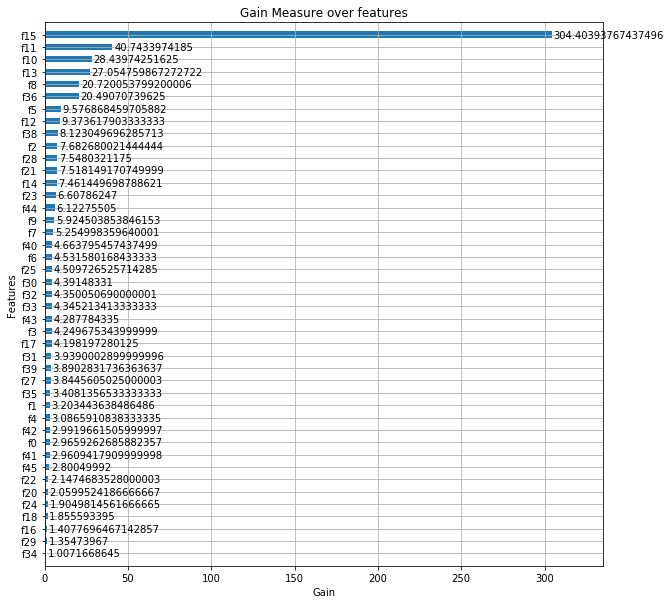

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.xlabel('Gain')
plt.ylabel('Features')
plt.title('Gain Measure over features')
plt.show()

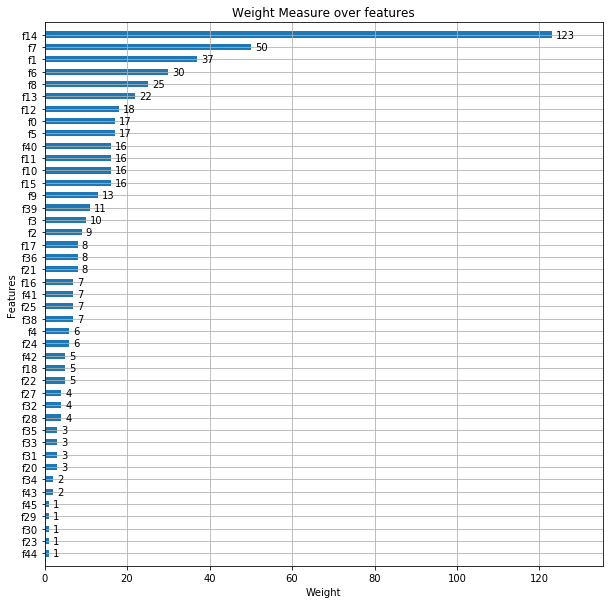

In [89]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.xlabel('Weight')

plt.ylabel('Features')
plt.title('Weight Measure over features')
plt.show()

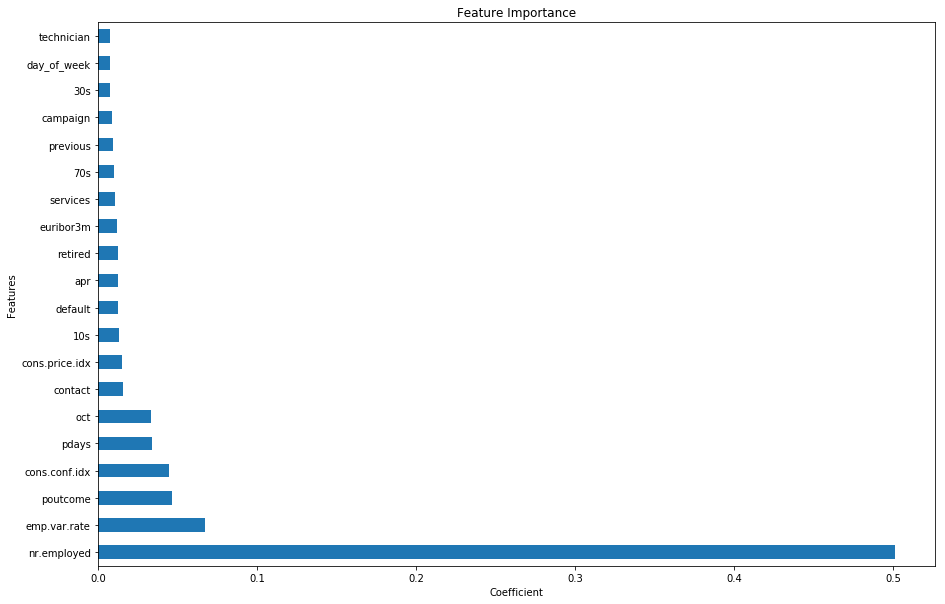

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

feat_importances = pd.Series(model.feature_importances_, index=X_df.columns)
feat_importances.nlargest(20).plot(kind='barh')


plt.xlabel('Coefficient')

plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('feature_importance')
plt.show()